<a href="https://colab.research.google.com/github/Luca-Davis/Luca-Bio108-Tutorial/blob/main/Luca_davis_Coding_Tutorial_draft_4_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Has precipitation decreased in glaciated areas in Montana and Wyoming more than in the dual-state area as a whole?

*


#Inspiration
I was inspired by the Patrick Gonzalez et al 2018 Environ. Res. Lett paper our conservation coding class read during week 5. This paper hypothesized that climate change disproportionaly affects U.S national parks compared to the U.S as a whole, finding that mean annual temperature increased 1.0 °C ± 0.2 between 1895 and 2010, double the rate of the u.s as a whole. These finding suggest that national parks are more exposed to the effects of climate change.

he Gonzales paper claimed that tempatures were increasing faster in national parks because they are more often in arctic regions and higher elevations.


#Objectives and questions I aim to take on

The Gonzales paper revealed how unique natural resources can be disproportionately vulnerable to climate change. This made me curious if a unique natural resource like glaciers might be disproportionately vulnerable to the effects of warming as well.
Having a precise understanding of the warming affecting glaciers is crucial. Glaicers have an indirect impact of wildife and fishiries. Glacier melt can drive phytoplankton blooms which is the base of aquatic and marine food chains.


#Data Pre-Processing
##Data Sources
###Lower 48 Glaciers: https://nsidc.org/data/glacier_inventory/
### Absolute Change in Snow Residence: https://www.fs.usda.gov/rm/boise/AWAE/projects/NFS-regional-climate-change-maps/categories/us-raster-layers.html
###Meta data for Lower 48 Glacier https://apps.fs.usda.gov/fsgisx01/rest/services/RDW_Climate/SnowResidenceTime_2080/ImageServer?utm_source=chatgpt.com






###Install Neccesary Packages

In [ ]:
###Install Neccesary Packages
!pip install earthpy
! pip install rasterstats
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



###Mount drive and make quick plot of both layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Vectors

##Glacier Vector

In [ ]:
# assign glacier file to variable (contains more than just shp!)
g_path = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/GLACIER48/USA_Glaciers_CopyFeatures_ExportFeatures.shp")

#using geopandas to read glacier file and get coordinate system and show the data frame.
glacier = gpd.read_file(g_path)
print(glacier.crs)
print(glacier.shape)
print(glacier.describe())
glacier.head()




EPSG:3857
(1523, 12)
               AREA     PERIMETER        RECNO      X_COORD      Y_COORD  \
count  1.523000e+03   1523.000000  1523.000000  1523.000000  1523.000000   
mean   3.775528e+05   2986.136286   764.388050  -118.030040    46.273413   
std    9.948197e+05   4006.205688   441.599029     5.166527     3.033491   
min    3.070306e+03    228.576000     1.000000  -123.770980    37.003620   
25%    5.791602e+04   1145.799000   382.500000  -121.651115    44.859035   
50%    1.148084e+05   1780.433000   764.000000  -121.053130    47.729290   
75%    2.586574e+05   2997.575000  1145.500000  -113.649090    48.588330   
max    1.366350e+07  63470.374000  1533.000000  -105.630890    48.999850   

         Shape_Leng    Shape_Area  
count   1523.000000  1.523000e+03  
mean    4371.276643  8.179868e+05  
std     5944.647804  2.200584e+06  
min      349.567883  7.149344e+03  
25%     1627.924218  1.201773e+05  
50%     2570.141819  2.378330e+05  
75%     4368.802692  5.509936e+05  
max   

,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,geometry
0,91690.225,1858.679,1488.0,-121.66363,45.34709,snow or ice body,USGS DRG,100K,None,2647.636765,186045.161045,"POLYGON ((-13543448.219 5676035.509, -13543509..."
1,34939.127,1251.714,1489.0,-121.67248,45.34688,snow or ice body,USGS DRG,100K,None,1778.595524,70894.305048,"POLYGON ((-13544270.929 5675977.907, -13544314..."
2,161450.661,2876.548,502.0,-120.93059,47.70061,snow or ice body,USGS DRG,100K,None,4275.313319,357253.154672,"POLYGON ((-13461380.088 6056475.46, -13461515...."
3,8573.238,451.969,1490.0,-121.71219,45.34819,snow or ice body,USGS DRG,100K,None,640.940289,17396.396640,"POLYGON ((-13548893.947 5676643.656, -13548911..."
4,186062.010,1845.828,503.0,-121.16056,47.55879,snow or ice body,USGS DRG,100K,None,2741.104958,409489.447162,"POLYGON ((-13487578.621 6033413.539, -13487777..."


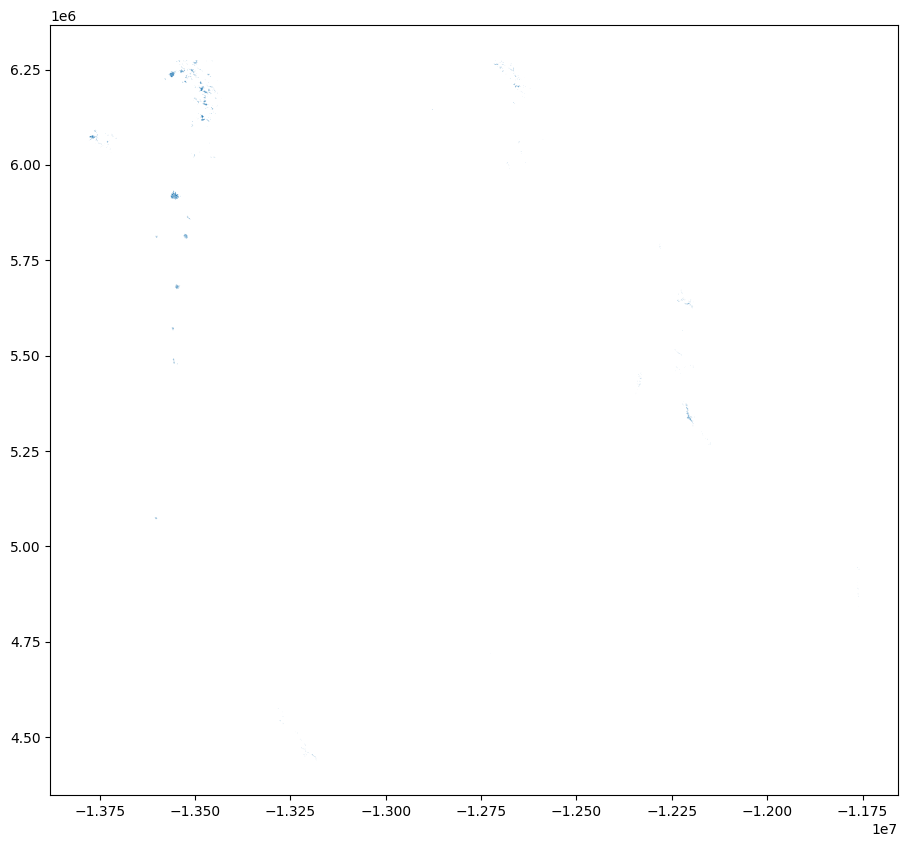

In [ ]:
#plotting glacier shapefile
fig, ax = plt.subplots(figsize = (20,10))
glacier.plot(ax=ax)
plt.show()

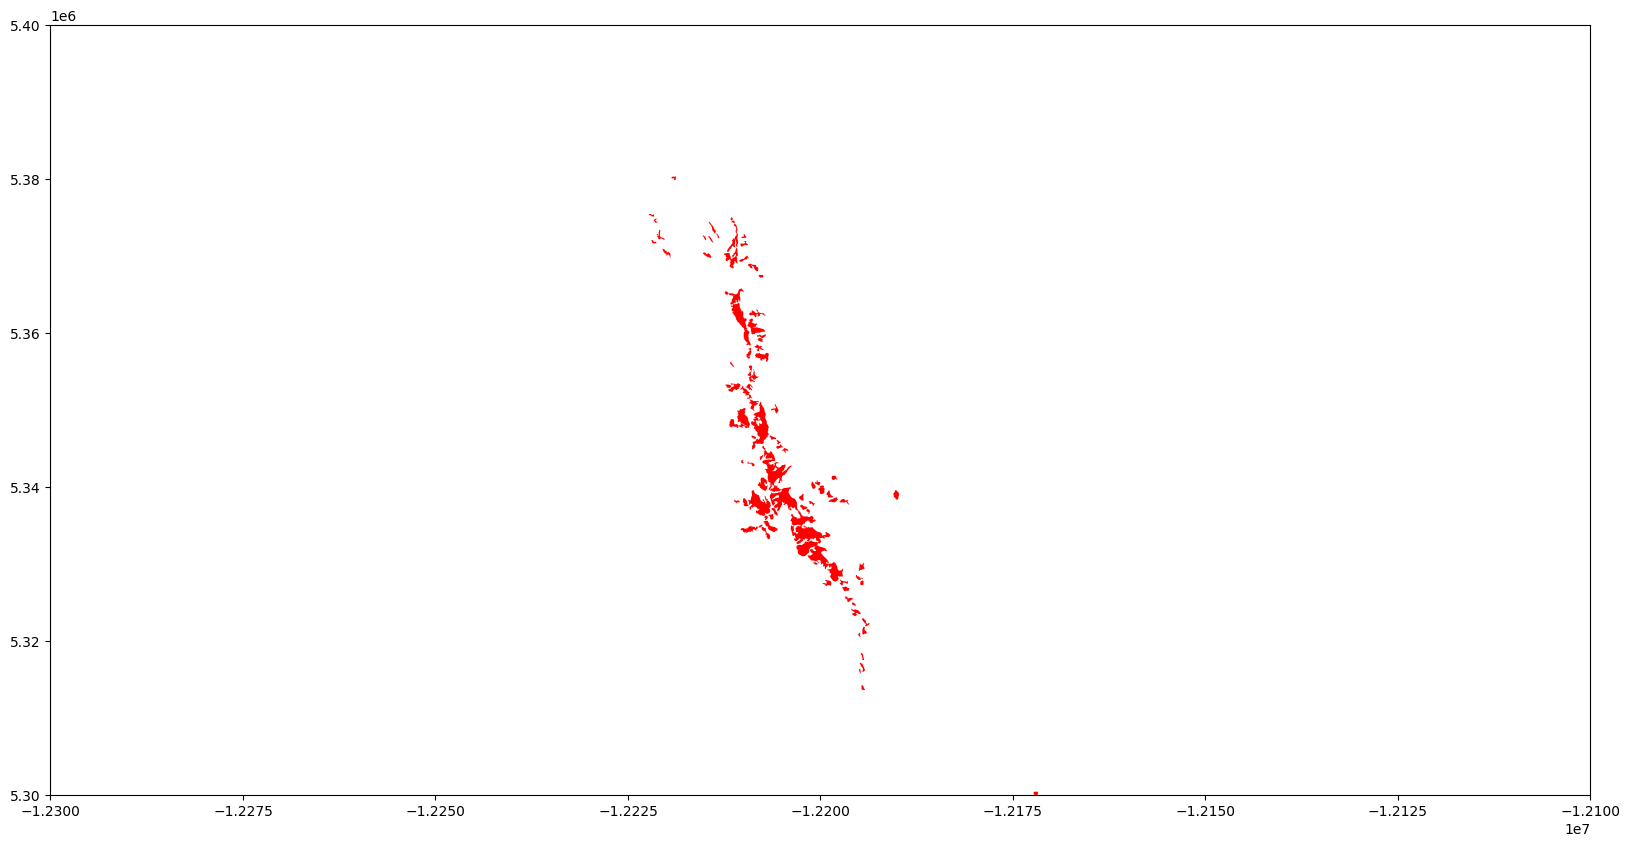

In [ ]:
#Examining the glacier plot
#plotting glacier shapefile
fig, ax = plt.subplots(figsize = (20,10))
glacier.plot(ax=ax, facecolor = 'red')
# Set bounding box for western U.S.
ax.set_xlim([-1.23e7, -1.21e7])
ax.set_ylim([5.3e6, 5.4e6])
plt.show()

##USA and State Boundary Vectors

In [ ]:
# assign usa file to variable (contains more than just shp!)
usa_path = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/USA/s_05mr24.shp")

#using geopandas to read usa file and get coordinate system and show the data frame.
usa = gpd.read_file(usa_path)
#Matching the coordinate reference systems for plotting
#usa = usa.to_crs(tiff.crs)
print(usa.crs)
usa.head()






EPSG:4269


,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.4909 37.00361, -110.4875 37.002..."
4,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.4262 32.79973, -118.42634..."


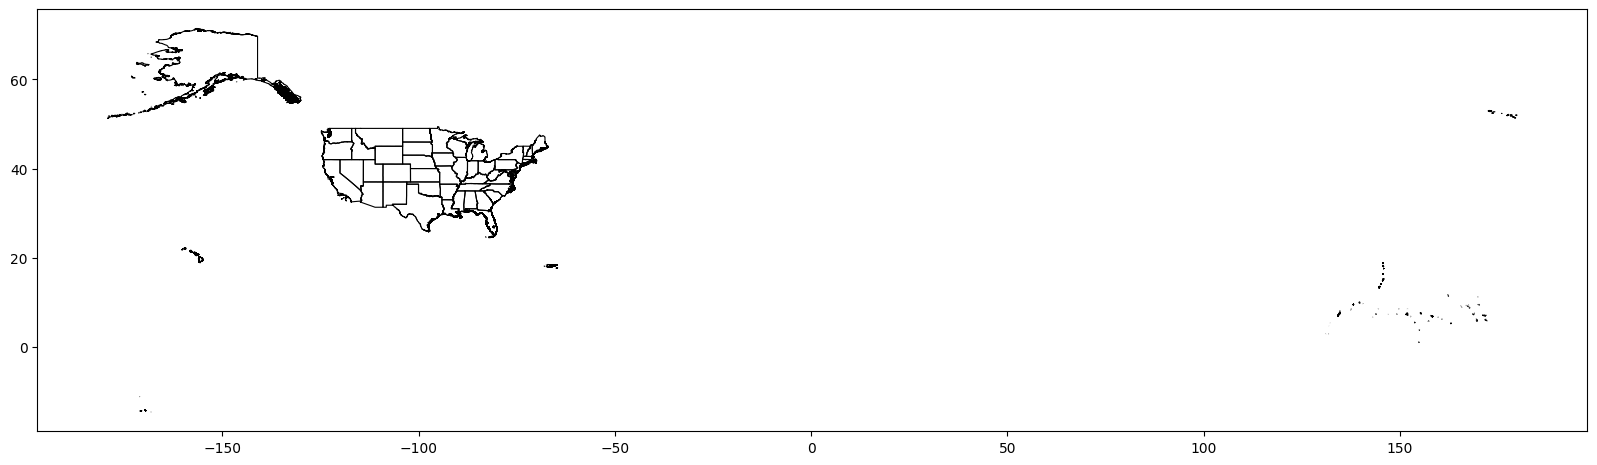

In [ ]:
#plotting usa shapefile

fig, ax = plt.subplots(figsize = (20,10))
usa.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)

plt.show()

In [ ]:
#filter the USA datarame
keep = ['Wyoming', 'Montana']
usa_2 = usa.loc[[name in keep for name in usa['NAME']]]
usa_2.head()


,STATE,NAME,FIPS,LON,LAT,geometry
24,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-114.3213 49.00081, -114.2604 49.000..."
49,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.10339 45.00591, -109.0892 45.00..."


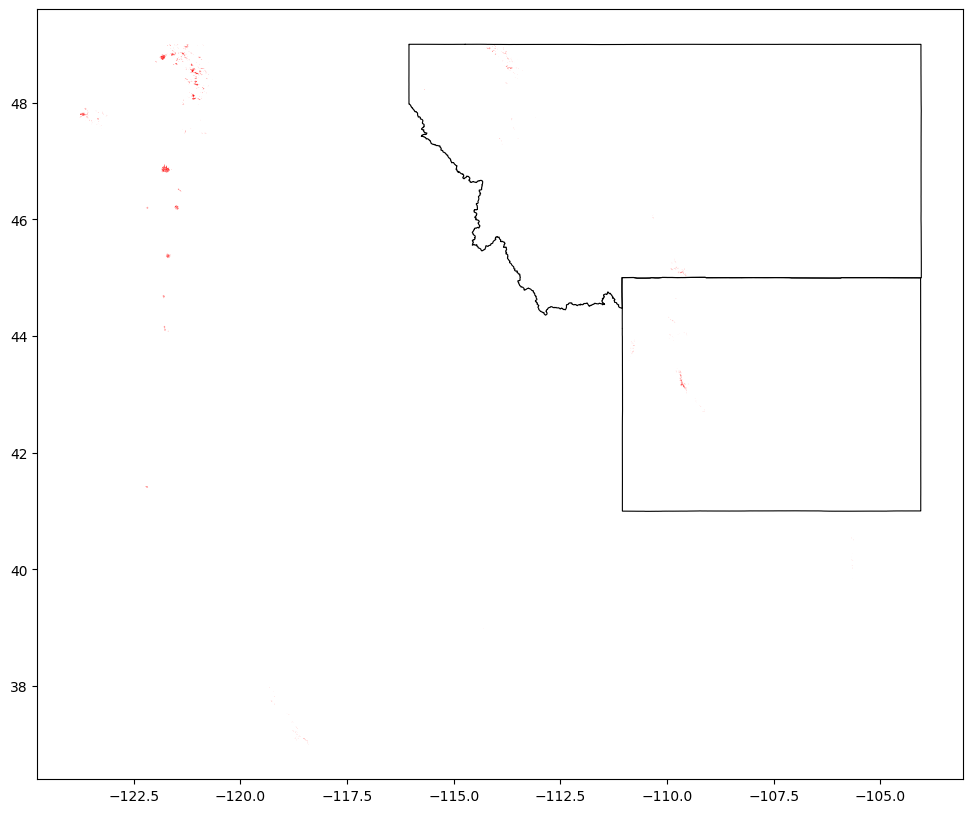

In [ ]:
#plotting glacier2 shapefile
glacier = glacier.to_crs(usa_2.crs)
fig, ax = plt.subplots(figsize = (20,10))
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
glacier.plot(ax=ax, facecolor = 'red')
plt.show()



##Raster layer: Absolute Change in Annual Precipitation

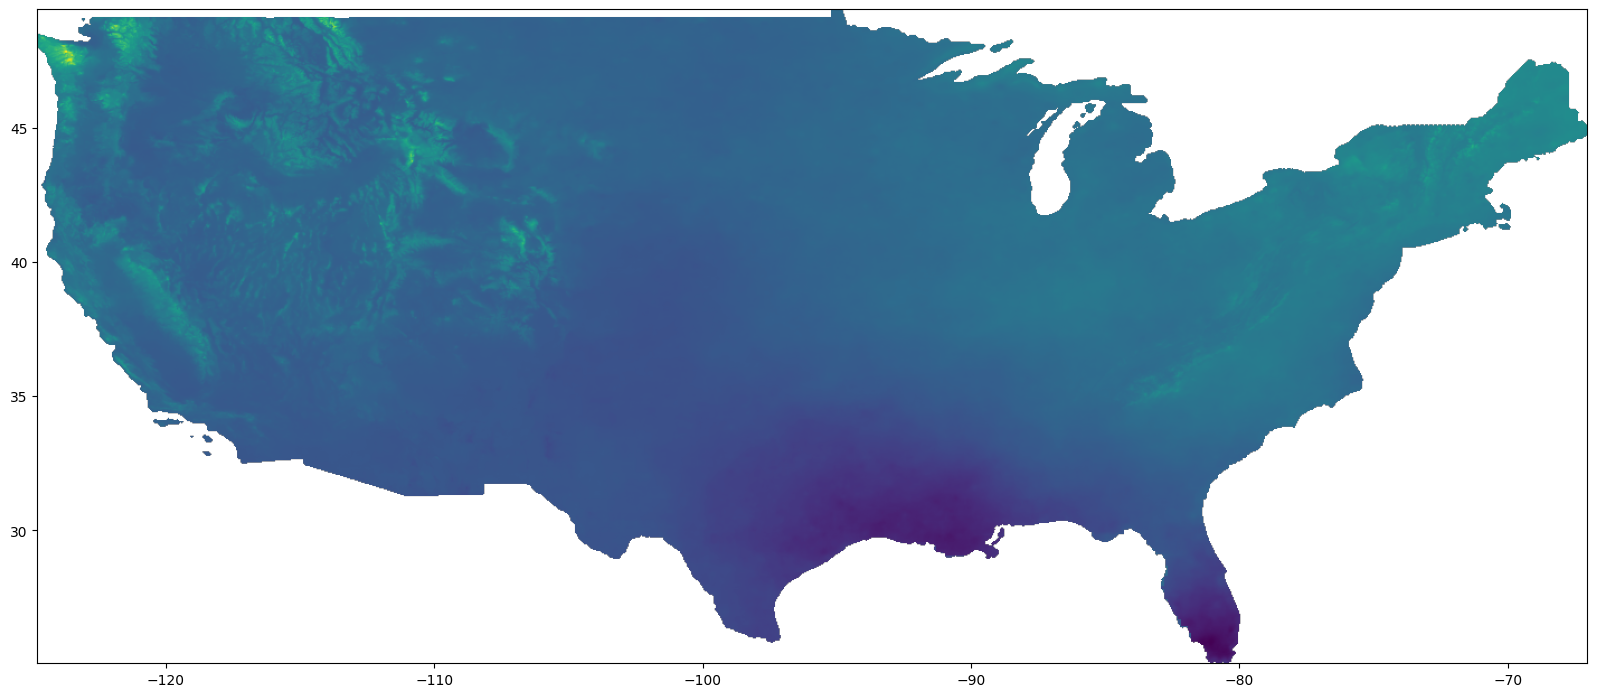

In [ ]:

#assigning url to raster and plotting it with raster.io This shows absolute tempature change in alaska.
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
plt.show()

# Paring down the number of Glaciers for Analysis

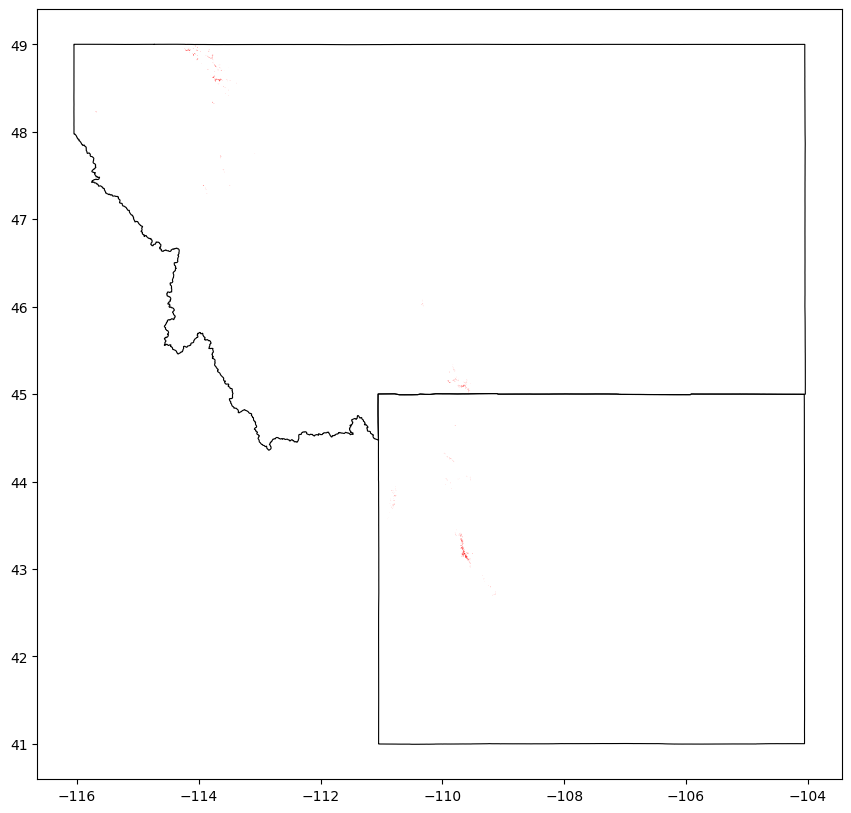

In [ ]:

# Use intersection to clip glacier geometries to the states
usa_2 = usa_2.to_crs(glacier.crs)
glacier_clipped = gpd.overlay(glacier, usa_2, how='intersection')
fig, ax = plt.subplots(figsize=(20, 10))
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
glacier_clipped.plot(ax=ax, facecolor='red')
plt.show()


In [ ]:
#The resulting glacier_clipped dataframe combines the attribute columns from both input layers so there are now about 17 columns
print(glacier_clipped.shape)
glacier_clipped.head()

#now isntead of 1500+ there is less 472



(472, 17)


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,STATE,NAME,FIPS,LON,LAT,geometry
0,67622.587,1053.881,1003.0,-109.55535,43.08424,snow or ice body,USGS DRG,100K,None,1444.159424,127058.256833,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.55614 43.08339, -109.55667 43.0..."
1,176169.290,2094.860,1004.0,-109.56125,43.08842,snow or ice body,USGS DRG,100K,None,2872.514285,331055.777090,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56194 43.08605, -109.56269 43.0..."
2,175583.984,2650.228,1005.0,-109.56718,43.10265,snow or ice body,USGS DRG,100K,None,3633.262144,330108.382208,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56979 43.10027, -109.57122 43.1..."
3,194819.390,1811.623,1006.0,-109.56479,43.09724,snow or ice body,USGS DRG,100K,None,2484.324484,366207.499648,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.56652 43.09533, -109.56702 43.0..."
4,257308.589,2749.144,1007.0,-109.58681,43.10225,snow or ice body,USGS DRG,100K,Harrower Glacier,3769.926886,483747.438994,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.58779 43.09962, -109.58808 43.0..."


## pareing down the glacier df even more so the raster extraction doesn't crash collab.
I will randomly drop half the rows. I could have done this by name or size, but I do not want to bias my analysis to well-studied or famous glaciers. Small glaciers should be represented.

In [ ]:
#showing old shape
print(glacier_clipped.shape)
# Randomly select 50% of the rows
selected_glac = glacier_clipped.sample(frac=0.5, random_state=42)

print(selected_glac.shape)
#proving we still have named and unmaned glacier of various sizes
selected_glac.head()

(472, 17)
(236, 17)


,AREA,PERIMETER,RECNO,X_COORD,Y_COORD,CLASSIFICA,SOURCE,SRC_SCALE,GLACNAME,Shape_Leng,Shape_Area,STATE,NAME,FIPS,LON,LAT,geometry
55,129790.933,1660.551,1059.0,-109.64226,43.21839,snow or ice body,USGS DRG,100K,None,2282.273731,2.449392e+05,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.63896 43.21887, -109.63902 43.2..."
73,537335.815,5843.927,1077.0,-109.69766,43.23786,snow or ice body,USGS DRG,100K,J Glacier,8031.178864,1.014682e+06,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.70058 43.23934, -109.69983 43.2..."
33,90630.076,1192.128,1037.0,-109.66381,43.36295,snow or ice body,USGS DRG,100K,None,1642.176203,1.718518e+05,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.66501 43.362, -109.66526 43.362..."
278,32004.364,846.957,1359.0,-109.53914,45.12355,snow or ice body,USGS DRG,100K,None,1202.153746,6.443033e+04,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-109.53791 45.12444, -109.53791 45.1..."
244,331951.829,3524.885,1325.0,-109.62810,45.10162,snow or ice body,USGS DRG,100K,None,5000.125300,6.677724e+05,MT,Montana,30,-109.64507,47.03350,"POLYGON ((-109.62594 45.10092, -109.62427 45.1..."


##Plotting the vector on the raster

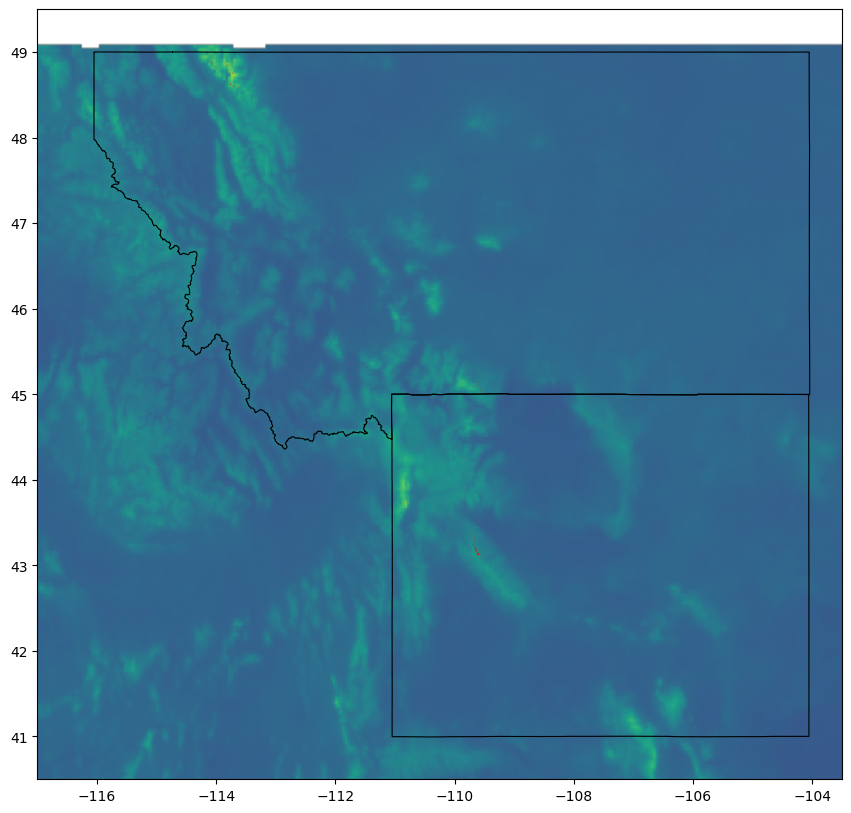

In [ ]:

#assigning url to raster and plotting it with raster.io This shows absolute tempature change in alaska.
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
selected_glac = selected_glac.to_crs(tiff.crs)
usa_2 = usa_2.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
selected_glac.plot(ax=ax, facecolor = 'red')

# Set bounding box for western U.S.
ax.set_xlim([-117, -103.5])
ax.set_ylim([40.5, 49.5])
plt.show()


##Getting a Closer Look 🔎

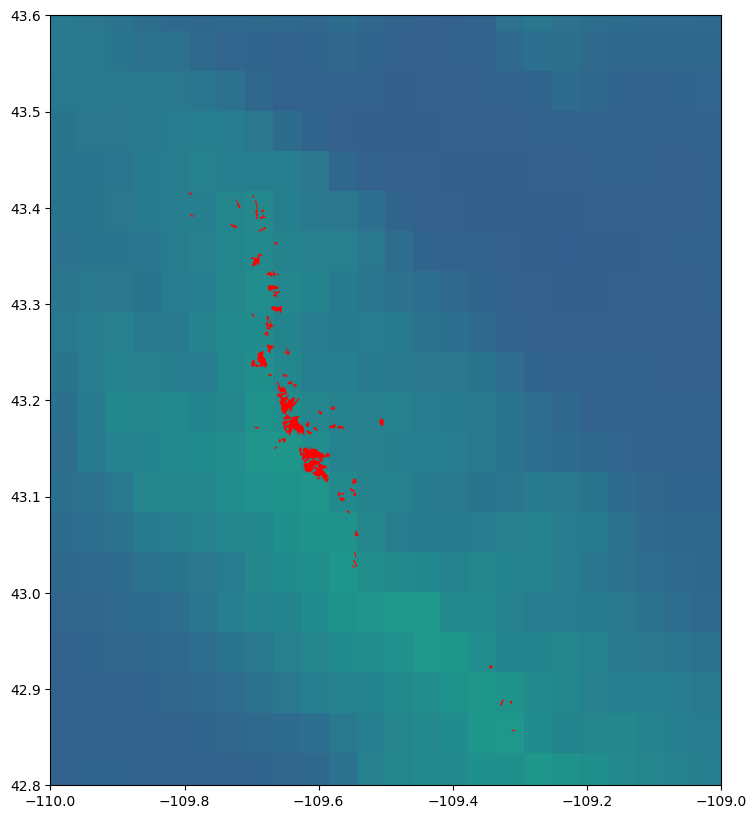

In [ ]:

# Zooming in with tighter bounds. This is thw wind river range
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
selected_glac = selected_glac.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
selected_glac.plot(ax=ax, facecolor = 'red')

# Set bounding box for western U.S.
ax.set_xlim([-110, -109])
ax.set_ylim([42.8, 43.6])
plt.show()


# Analytical Aproach





I will extract the raster values of the glaciers, which is a polygon 'data layer'.

# Implement the analysis and/or visualization using Python code.

###Creating a dataframe of extracted mean tempatures for each glacier polygon

In [ ]:
#Installing rasterstats
!pip install rasterstats
from rasterstats import zonal_stats

In [ ]:
#using rasterstats'zonal stats to extract the snow residence of the vector
result = zonal_stats(
    selected_glac,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result
#The result is mostly empty because the glaciers are to small to fully contain even on 4km raster pixel

[{'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': 242.71695198366024},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},


##The fix for the empty values in the result

In [ ]:
#creating buffer around glacier to expand their size

#first reproject to a crs meters not degrees
glacier_proj = selected_glac.to_crs(epsg=32612)

glacier_buffered = glacier_proj.copy()

glacier_buffered['geometry'] = glacier_buffered.buffer(4000)  # buffer outward ~4000 meters so they all conatin at least on 4km pixel
#trying extraction again



#(This is where I can't understand why it's crashing so much)

 This is the operation that crashes collab!

In [ ]:
#using rasterstats'zonal stats to extract the snow residence of the vector
result2 = zonal_stats(
    glacier_buffered,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result2

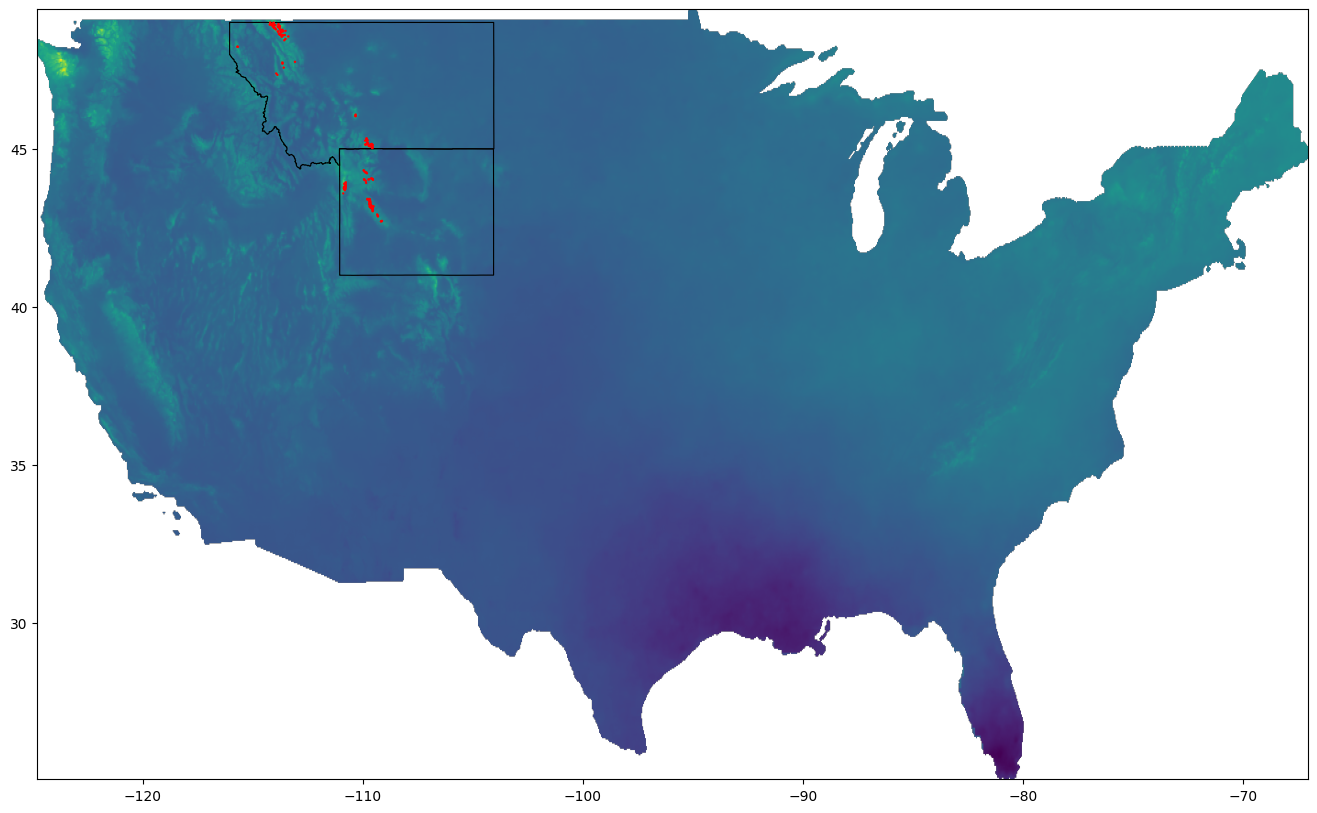

In [ ]:

# Plotting with buffered glacier polygons
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
glacier_buffered = glacier_buffered.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
glacier_buffered.plot(ax=ax, facecolor = 'red')


plt.show()

# Trying raster extraction with a minimal subset.

In [ ]:
subset = selected_glac.iloc[0: 30]


NameError: name 'selected_glac' is not defined

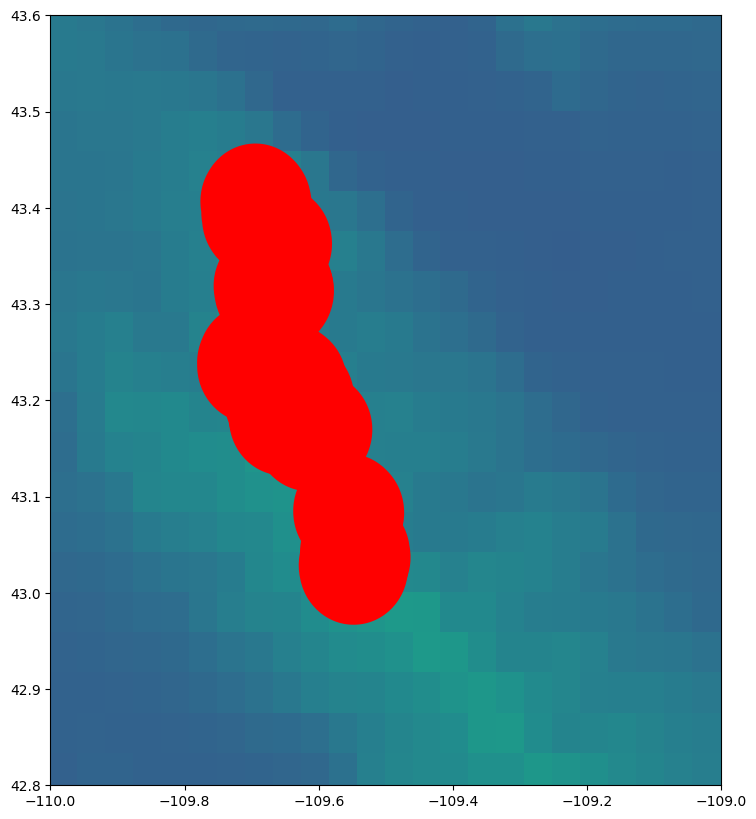

In [ ]:
# Zooming in with tighter bounds. This is thw wind river range
raster_path2 = ("/content/drive/MyDrive/Classes_Spring_2025/Conservation_Coding/data/PRECIP/Ppt_annual_AbsChange.tif")
tiff = rasterio.open(raster_path2)

#Matching the coordinate reference systems for plotting
subset = subset.to_crs(tiff.crs)

# plotting the vectors on the raster
fig, ax = plt.subplots(figsize = (20,10))
rasterio.plot.show(tiff, ax=ax)
usa_2.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)
subset.plot(ax=ax, facecolor = 'red')

# Set bounding box for western U.S.
ax.set_xlim([-110, -109])
ax.set_ylim([42.8, 43.6])
plt.show()

In [ ]:
#using rasterstats'zonal stats to extract the snow residence of the vector
result3 = zonal_stats(
    subset,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result3

[{'mean': 131.38597697719902},
 {'mean': 135.66275683495394},
 {'mean': 125.19154903441418},
 {'mean': 119.0575657360116},
 {'mean': 152.91848022772504},
 {'mean': 126.23221411517451},
 {'mean': 117.36876029778719},
 {'mean': 146.3137194899944},
 {'mean': 228.29773796765332},
 {'mean': 130.761018560721},
 {'mean': 143.522953649576},
 {'mean': 272.770306548457},
 {'mean': 141.8897032301213},
 {'mean': 276.4485284435034},
 {'mean': 119.9290179130157},
 {'mean': 156.26665528147527},
 {'mean': 218.55629714008901},
 {'mean': 229.84023440813823},
 {'mean': 258.309602319589},
 {'mean': 140.70556118631876},
 {'mean': 138.12678333243912},
 {'mean': 146.8002266789799},
 {'mean': 135.56392955494786},
 {'mean': 193.2276337884709},
 {'mean': 141.06143125006875},
 {'mean': 194.68132963693301},
 {'mean': 155.6613297824904},
 {'mean': 138.58065025661182},
 {'mean': 128.4762439843615},
 {'mean': 155.37738173523735}]